

# Project: ['FBI Gun Data']('https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a5623_ncis-and-census-data/ncis-and-census-data.zip') original source on ['Github']('https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md') 

## Analysed by:  **_Samiha Amroune_** 
 

## Overview & Notes

<p>
    The data comes from the FBI's National Instant Criminal Background Check System. 
The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives.
Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.
The data has been supplemented with state level data
from census.gov.
<ul>
    <li>The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.</li>
    <li>The U.S. census data is found in a .csv file. It contains several variables at the state level.
Most variables just have one data point per state (2016), but a few have data for more than one year.</li>
</ul>
</p>

We will answer these questions:
<ol>
    <li><a href="#q1">What census data is most associated with high gun per capita?</a></li>
    <li><a href="#q2">Data Which states have had the highest growth in gun registrations?</a></li>
    <li><a href="#q3">What is the overall trend of gun purchases?</a></li>
    <li><a href="#q4">What is the percentage of the number of permits to the totals?</a></li>
</ol>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
# Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

In [2]:
df_gun = pd.read_csv('gun_data.csv', sep=';')
df = pd.read_csv('US_Census_Data.csv')

In [3]:
print(df_gun.shape)
df_gun.head()

(12485, 27)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
# Load data
print(df.shape)
df.head()

(85, 52)


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


## Census Data Cleaning

In [5]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [6]:
df[df.duplicated()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop_duplicates()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#To see if i need to drop or filna the column with non value
np.where(pd.isnull(df))

(array([ 0,  1,  2, ..., 84, 84, 84]), array([ 1,  1,  1, ..., 49, 50, 51]))

In [9]:
# drop the column where all values in it is null
df.dropna(how='all', inplace=True)

In [10]:
#drop fact Note I dont need it im my analyst
df.drop(labels= 'Fact Note', axis=1, inplace=True)

In Gan_data, the states were in a column, so for best comparison i need to reverse column to the rows

using [Transpose pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html)

In [11]:
# to reverse the column to the row and rows to the column
df = df.transpose()

In [12]:
# check changes
print(df.shape)
df.head()

(51, 81)


,0,1,2,3,4,5,6,7,8,9,...,74,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,(c),Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fix the census data Header

In [13]:
# assign the column
df.columns = df.iloc[0]

In [14]:
#drop the first index
df.drop(df.index[0], inplace=True)

In [15]:
# get the slice that i want in my analysis from this data
df_e = df.iloc[:, :2]

In [16]:
df_e.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
Alabama,"4,863,300","4,780,131"
Alaska,"741,894","710,249"
Arizona,"6,931,071","6,392,301"
Arkansas,"2,988,248","2,916,025"
California,"39,250,017","37,254,522"


In [17]:
# save the slice in a new file
df_e.to_csv('df_census_clean.csv')

In [18]:
#import my new df saved to edit it
df_c = pd.read_csv('df_census_clean.csv', thousands=',')
print(df_c.shape)
df_c.head()

(50, 3)


,Unnamed: 0,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
0,Alabama,4863300,4780131
1,Alaska,741894,710249
2,Arizona,6931071,6392301
3,Arkansas,2988248,2916025
4,California,39250017,37254522


In [19]:
# rename column
df_c.rename(columns={'Unnamed: 0': 'state'}, inplace=True)

> According to the way they wrote the name of the next two columns, I could not change it using rename(), so i used set values instead

In [20]:
df_c.columns.values[2] = "Population_estimates_2010"
df_c.columns.values[1] = "Population_estimates_2016"

In [21]:
# check changes
print(df_c.shape)
df_c.head()

(50, 3)


,state,Population_estimates_2016,Population_estimates_2010
0,Alabama,4863300,4780131
1,Alaska,741894,710249
2,Arizona,6931071,6392301
3,Arkansas,2988248,2916025
4,California,39250017,37254522


In [22]:
# save all changes in a new file
df_c.to_csv('df_census_final.csv', index=False)

> [Remove thousand comma separator](https://stackoverflow.com/questions/61786815/how-can-i-remove-the-thousand-comma-separator-when-converting-data-frame-columns)

In [23]:
# using thousands to remove ',' in numbers
df_census = pd.read_csv('df_census_final.csv', thousands=',')

In [24]:
print(df_census.shape)
df_census.head()

(50, 3)


,state,Population_estimates_2016,Population_estimates_2010
0,Alabama,4863300,4780131
1,Alaska,741894,710249
2,Arizona,6931071,6392301
3,Arkansas,2988248,2916025
4,California,39250017,37254522


## Gun Data Cleaning

In [25]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

> **Here i foun that the data type of month need to be a dateframe, so i will convert it from str to datetime**

In [26]:
#set data type of month
df_gun['month'] = pd.to_datetime(df_gun['month'], format = '%Y-%m')

In [27]:
# drop null rows that have NaN value
df_gun.dropna(how='all',inplace=True)

In [28]:
data = [
    'returned_other',
    'rentals_handgun',
    'rentals_long_gun',
    'private_sale_handgun',
    'private_sale_long_gun',
    'private_sale_other',
    'return_to_seller_handgun',
    'return_to_seller_long_gun',
    'return_to_seller_other',
    'returned_long_gun',
    'returned_handgun',
    'permit_recheck',
    'admin',
    'prepawn_handgun',
    'prepawn_long_gun',
    'prepawn_other',
    'redemption_handgun',
    'redemption_long_gun',
    'redemption_other'
]
df_gun.drop(labels= data, axis=1, inplace=True)
print(df_gun.shape)

(12485, 8)


In [29]:
df_gun.isnull().sum()

month          0
state          0
permit        24
handgun       20
long_gun      19
other       6985
multiple       0
totals         0
dtype: int64

In [30]:
def filmean(par):
    df_gun.fillna(df_gun[par].mean(), inplace=True)

In [31]:
filmean('permit')

In [32]:
filmean('handgun')

In [33]:
df_gun.head(10)

,month,state,permit,handgun,long_gun,other,multiple,totals
0,2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,317,32019
1,2017-09-01,Alaska,209.0,2320.0,2930.0,219.0,160,6303
2,2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0,631,28394
3,2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747
4,2017-09-01,California,57839.0,37165.0,24581.0,2984.0,0,123506
5,2017-09-01,Colorado,4356.0,15751.0,13448.0,1007.0,1062,35873
6,2017-09-01,Connecticut,4343.0,4834.0,1993.0,274.0,0,12117
7,2017-09-01,Delaware,275.0,1414.0,1538.0,66.0,68,3502
8,2017-09-01,District of Columbia,1.0,56.0,4.0,0.0,0,61
9,2017-09-01,Florida,10784.0,39199.0,17949.0,2319.0,1721,77390


In [34]:
df_gun.duplicated().sum()

0

> **I want to unify the states between the two tables**

In [35]:
# Find mismatched states between the two tables
rows_gun = df_gun.state.values
rows = df_census.state.values
row = []
for i in rows_gun:
    if i not in rows and i not in row:
        row.append(i)
print(row)
#District of Columbia,Guam,'Mariana Islands'

['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']


In [36]:
# Drop rows mismatch
row = [
    'District of Columbia',
    'Guam',
    'Mariana Islands',
    'Puerto Rico',
    'Virgin Islands'
]
for i in row:
    df_gun.drop(index=df_gun[df_gun['state'] == i].index, inplace=True)

In [37]:
print(df_gun.shape)
df_gun.head()

(11350, 8)


,month,state,permit,handgun,long_gun,other,multiple,totals
0,2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,317,32019
1,2017-09-01,Alaska,209.0,2320.0,2930.0,219.0,160,6303
2,2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0,631,28394
3,2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747
4,2017-09-01,California,57839.0,37165.0,24581.0,2984.0,0,123506


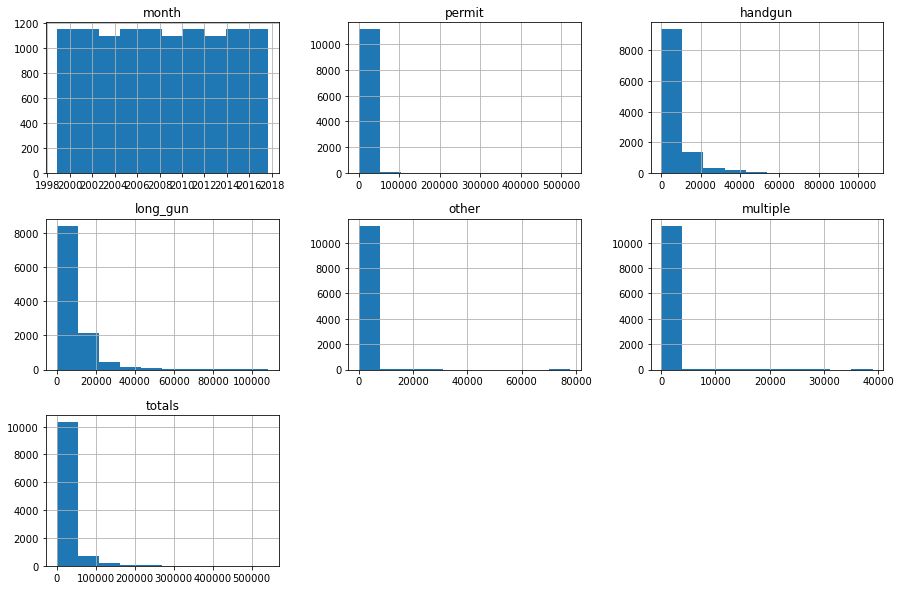

In [38]:
df_gun.hist(figsize=(15, 10));

> **In census data there are 'Population estimates' for '2016-07-01' and '2010-04-01' so i slice my data in gun data into this two dates**

>**Then, I will use it in the rest of my analysis**

In [39]:
# Get data for a month = '2016-07-01'
df_16 = df_gun[df_gun['month'] == '2016-07-01']
print(df_16.shape)
df_16.head()

(50, 8)


,month,state,permit,handgun,long_gun,other,multiple,totals
770,2016-07-01,Alabama,27765.0,10132.0,7392.0,538.0,465,48927
771,2016-07-01,Alaska,215.0,2898.0,2816.0,239.0,165,6793
772,2016-07-01,Arizona,7863.0,13693.0,8643.0,1283.0,642,34496
773,2016-07-01,Arkansas,4116.0,6323.0,5053.0,325.0,367,19378
774,2016-07-01,California,77962.0,46361.0,47594.0,17297.0,0,190218


In [40]:
# Get data for a month = '2010-04-01'
df_10 = df_gun[df_gun['month'] == '2010-04-01']
print(df_10.shape)
df_10.head()

(50, 8)


,month,state,permit,handgun,long_gun,other,multiple,totals
4895,2010-04-01,Alabama,396.0,8727.0,8095.0,131.0,394,20791
4896,2010-04-01,Alaska,0.0,2650.0,3136.0,64.0,135,6411
4897,2010-04-01,Arizona,1905.0,7787.0,5097.0,198.0,309,16578
4898,2010-04-01,Arkansas,4303.0,3865.0,3833.0,45.0,197,14563
4899,2010-04-01,California,26930.0,26170.0,27650.0,0.0,0,80750


> **In census data i will slice each Population estimates by date to merge it later**

In [41]:
# slice each Population estimates 2016
df_c_16 = df_census.iloc[:, :2]
df_c_16.head()

,state,Population_estimates_2016
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


> [pandas.Series.iloc](https://pandas.pydata.org/docs/reference/api/pandas.Series.iloc.html?highlight=iloc#pandas.Series.iloc)

In [42]:
# slice each Population estimates 2010
df_c_10 = df_census.iloc[:, lambda df_census: [0, 2]]
df_c_10.head()

,state,Population_estimates_2010
0,Alabama,4780131
1,Alaska,710249
2,Arizona,6392301
3,Arkansas,2916025
4,California,37254522


> [Merge doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [43]:
# merge the two dataframe 2016
dfinal_16 = df_c_16.merge(df_16, on="state", how = 'inner')
dfinal_16.head()

,state,Population_estimates_2016,month,permit,handgun,long_gun,other,multiple,totals
0,Alabama,4863300,2016-07-01,27765.0,10132.0,7392.0,538.0,465,48927
1,Alaska,741894,2016-07-01,215.0,2898.0,2816.0,239.0,165,6793
2,Arizona,6931071,2016-07-01,7863.0,13693.0,8643.0,1283.0,642,34496
3,Arkansas,2988248,2016-07-01,4116.0,6323.0,5053.0,325.0,367,19378
4,California,39250017,2016-07-01,77962.0,46361.0,47594.0,17297.0,0,190218


In [44]:
# merge the two dataframe 2010
dfinal_10 = df_c_10.merge(df_10, on="state", how = 'inner')
dfinal_10.head()

,state,Population_estimates_2010,month,permit,handgun,long_gun,other,multiple,totals
0,Alabama,4780131,2010-04-01,396.0,8727.0,8095.0,131.0,394,20791
1,Alaska,710249,2010-04-01,0.0,2650.0,3136.0,64.0,135,6411
2,Arizona,6392301,2010-04-01,1905.0,7787.0,5097.0,198.0,309,16578
3,Arkansas,2916025,2010-04-01,4303.0,3865.0,3833.0,45.0,197,14563
4,California,37254522,2010-04-01,26930.0,26170.0,27650.0,0.0,0,80750


<a id='eda'></a>
# Exploratory Data Analysis

<a id='q1'></a>
### Answer to Q1: What census data is most associated with high gun per capita?

> **Explore for  year '2016'** 
[Calculate percentage](https://www.geeksforgeeks.org/how-to-calculate-the-percentage-of-a-column-in-pandas/) 

In [45]:
# Calculate the percentage of each total by state in 2016-07-01
dfinal_16['percent_16'] = (dfinal_16['totals'] / 
                      dfinal_16['Population_estimates_2016'].sum()) * 100
dfinal_16.head()

,state,Population_estimates_2016,month,permit,handgun,long_gun,other,multiple,totals,percent_16
0,Alabama,4863300,2016-07-01,27765.0,10132.0,7392.0,538.0,465,48927,0.015174
1,Alaska,741894,2016-07-01,215.0,2898.0,2816.0,239.0,165,6793,0.002107
2,Arizona,6931071,2016-07-01,7863.0,13693.0,8643.0,1283.0,642,34496,0.010698
3,Arkansas,2988248,2016-07-01,4116.0,6323.0,5053.0,325.0,367,19378,0.006010
4,California,39250017,2016-07-01,77962.0,46361.0,47594.0,17297.0,0,190218,0.058992


In [46]:
# calculate the sum of percentage in 2016-07-01
gun_per_capita16 = dfinal_16.percent_16.sum()
gun_per_capita16

0.677793390263384

> **Explore for  year '2010'**

In [47]:
# Calculate the percentage of each total by state in 2010-04-01
dfinal_10['percent_10'] = (dfinal_10['totals'] / 
                      dfinal_10['Population_estimates_2010'].sum()) * 100
dfinal_10.head()

,state,Population_estimates_2010,month,permit,handgun,long_gun,other,multiple,totals,percent_10
0,Alabama,4780131,2010-04-01,396.0,8727.0,8095.0,131.0,394,20791,0.006747
1,Alaska,710249,2010-04-01,0.0,2650.0,3136.0,64.0,135,6411,0.002080
2,Arizona,6392301,2010-04-01,1905.0,7787.0,5097.0,198.0,309,16578,0.005380
3,Arkansas,2916025,2010-04-01,4303.0,3865.0,3833.0,45.0,197,14563,0.004726
4,California,37254522,2010-04-01,26930.0,26170.0,27650.0,0.0,0,80750,0.026204


In [48]:
# calculate the sum of percentage in 2010-04-01
gun_per_capita10 =dfinal_10.percent_10.sum()
gun_per_capita10

0.3978133320178106

In [49]:
#calculate Percentage increase over 6 years
dif_gun_per_c = gun_per_capita16 - gun_per_capita10
dif_gun_per_c

0.2799800582455734

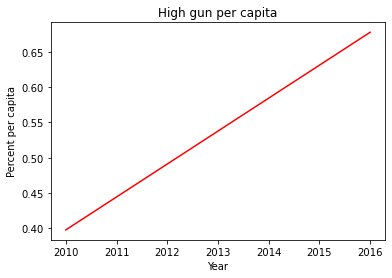

In [50]:
#plot the result for better comparaison:
year = [2010, 2016]
gun_per_capita = [gun_per_capita10, gun_per_capita16]

plt.title('High gun per capita')
plt.xlabel('Year')
plt.ylabel('Percent per capita')
plt.plot(year, gun_per_capita, color='red')
plt.show()

### Answer Q1:
> From the previous results, we note that the percentage of gun per capita in:
> - **2010** are: **0.3978133320178106%** 
> - **2016** are: **0.677793390263384%**

> According to the plot line, the percentage of High gun increased from **2010** to **2016**: **0.28٪**

<a id='q2'></a>
### Question2: Data Which states have had the highest growth in gun registrations?

> Reorder of countries with the highest growth rate in arms registrations, from highest to lowest

> [Pandas Top n](#https://stackoverflow.com/questions/58272872/pandas-top-n-values-in-each-group?noredirect=1&lq=1)

In [51]:
# reorder of year 2010
dfinal_10.sort_values(['totals'], ascending=False).head(10)

,state,Population_estimates_2010,month,permit,handgun,long_gun,other,multiple,totals,percent_10
16,Kentucky,4339344,2010-04-01,194706.0,6274.0,6352.0,104.0,440,211261,0.068556
43,Utah,2763888,2010-04-01,103873.0,2379.0,2996.0,0.0,143,109391,0.035499
4,California,37254522,2010-04-01,26930.0,26170.0,27650.0,0.0,0,80750,0.026204
42,Texas,25146100,2010-04-01,9221.0,24481.0,21343.0,595.0,1232,65012,0.021097
12,Illinois,12831574,2010-04-01,36904.0,8557.0,8005.0,0.0,463,53929,0.017501
37,Pennsylvania,12702857,2010-04-01,211.0,1.0,49644.0,0.0,393,50249,0.016306
45,Virginia,8001041,2010-04-01,0.0,25259.0,18158.0,0.0,720,44137,0.014323
8,Florida,18804592,2010-04-01,1.0,26817.0,12952.0,0.0,1207,42794,0.013887
34,Ohio,11536727,2010-04-01,1.0,17333.0,11342.0,329.0,635,31312,0.010161
41,Tennessee,6346298,2010-04-01,9391.0,12533.0,8066.0,0.0,463,30453,0.009882


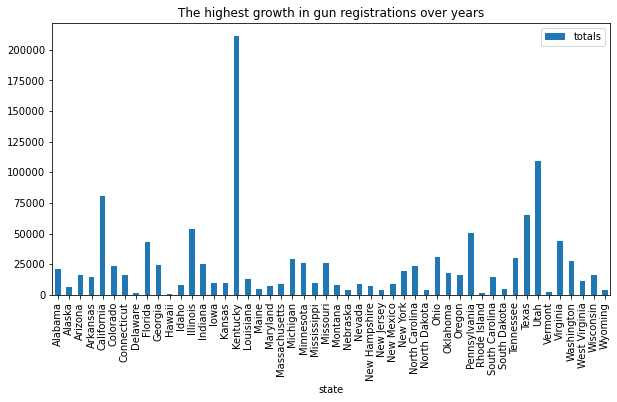

In [52]:
# Plot the result
dfinal_10.plot(
    x='state',
    y='totals',
    kind='bar',
    title='The highest growth in gun registrations over years',
    figsize=(10,5)
);

In [53]:
# reorder of year 2016
dfinal_16.sort_values(['totals'], ascending=False).head(10)

,state,Population_estimates_2016,month,permit,handgun,long_gun,other,multiple,totals,percent_16
16,Kentucky,4436974,2016-07-01,342858.0,9378.0,6615.0,321.0,534,363085,0.112603
4,California,39250017,2016-07-01,77962.0,46361.0,47594.0,17297.0,0,190218,0.058992
12,Illinois,12801539,2016-07-01,125075.0,21421.0,11881.0,0.0,881,168227,0.052172
42,Texas,27862596,2016-07-01,24634.0,50499.0,34266.0,4046.0,2698,127207,0.039451
8,Florida,20612439,2016-07-01,28106.0,57902.0,28000.0,4504.0,2324,125208,0.038831
13,Indiana,6633053,2016-07-01,53844.0,19508.0,12191.0,1600.0,644,88340,0.027397
37,Pennsylvania,12784227,2016-07-01,26819.0,46843.0,11793.0,19.0,0,86137,0.026714
34,Ohio,11614373,2016-07-01,11762.0,27876.0,17720.0,2166.0,1232,63148,0.019584
41,Tennessee,6651194,2016-07-01,1915.0,26276.0,16118.0,0.0,1374,57653,0.017880
9,Georgia,10310371,2016-07-01,20555.0,15342.0,8597.0,635.0,632,49183,0.015253


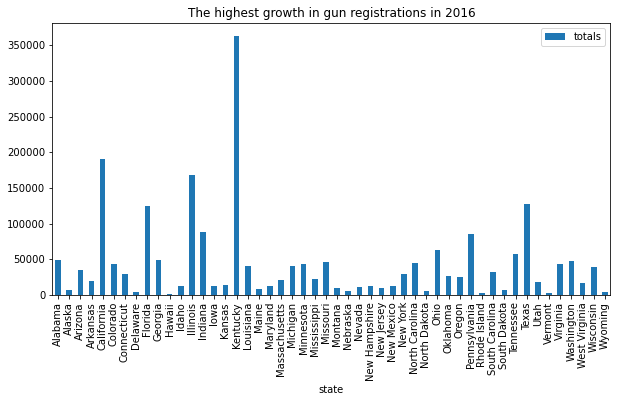

In [54]:
#plot the result
dfinal_16.plot(
    x='state',
    y='totals',
    kind='bar',
    title='The highest growth in gun registrations in 2016',
    figsize=(10,5)
);

### Answer Q2:
> From the previous result, we note that the top 10 highest growth in gun registrations:

> **2010-04-01** are: 

    - Kentucky  
    - Utah  
    - California    
    - Texas 
    - Illinois  
    - Pennsylvania  
    - Virginia  
    - Florida   
    - Ohio  
    - Tennessee 
   
   
> **2016-07-01** are:

    - Kentucky  
    - California    
    - Illinois  
    - Texas 
    - Florida   
    - Indiana
    - Pennsylvania  
    - Ohio  
    - Tennessee 
    - Georgia

<a id='q3'></a>
### Question3: What is the overall trend of gun purchases?

In [55]:
# Calculate the sum of each kind of gun in global data
guns = [
    'handgun',
    'long_gun',
    'other',
    'multiple'
]
trend_gun = []
for gun in guns:
     trend_gun.append(df_gun[gun].sum())
print(trend_gun)
    

[73880599.0, 97331240.0, 42706808.71374689, 3348925]


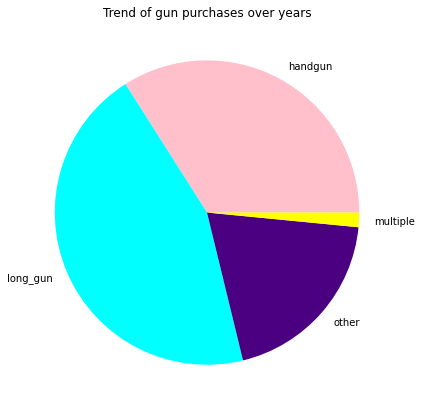

In [56]:
#plot the result for better comparaison:
# Creating plot
colors = ( "pink", "cyan", "indigo", "yellow")
fig = plt.figure(figsize =(10, 7))
plt.pie(trend_gun, labels = guns, colors=colors)
# displaying the title
plt.title('Trend of gun purchases over years')
plt.show()

In [57]:
# Calculate the sum of each kind of gun in 2010-04-01
trend_10 = []
for gun in guns:
     trend_10.append(dfinal_10[gun].sum())
print(trend_10)

[313739.0, 349245.0, 4366.0, 15411]


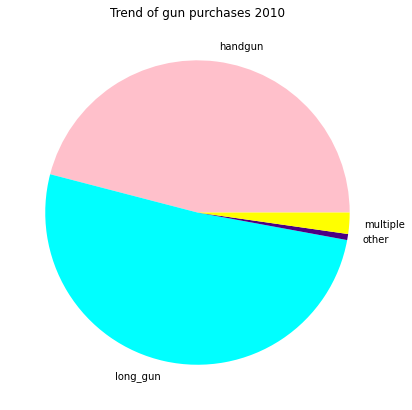

In [58]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(trend_10, labels = guns, colors=colors)
# displaying the title
plt.title('Trend of gun purchases 2010')
# show plot
plt.show()

In [59]:
# Calculate the sum of each kind of gun in 2016-07-01
trend_16 = []
for gun in guns:
     trend_16.append(dfinal_16[gun].sum())
print(trend_16)

[627515.0, 440051.0, 53287.0, 21390]


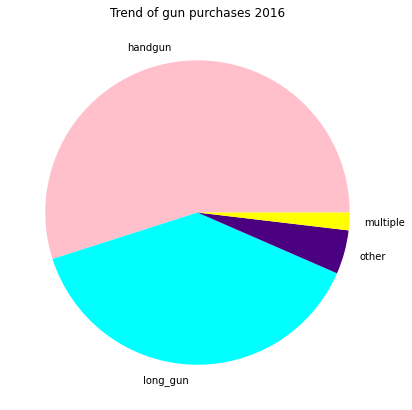

In [60]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(trend_16, labels = guns, colors=colors)
# displaying the title
plt.title('Trend of gun purchases 2016')
# show plot
plt.show()

### Answer Q3:

#### The general trend for the purchase of weapons is as follows, from highest to lowest:

> <ol>
    <li><b>Long_gun:</b> '97331240.0' </li>
    <li><b>Handgun:</b> '73880599.0' </li>
    <li><b>Other:</b> '42706808.71374689' </li>
    <li><b>Multiple:</b>'3348925'</li>
</ol>

#### The general trend for the purchase in *2010-04-01* of weapons is as follows, from highest to lowest:
> <ol>
    <li><b>Long_gun:</b> '349245.0' </li>
    <li><b>Handgun:</b> '313739.0' </li>
    <li><b>Multiple:</b>'4366.0'</li>
    <li><b>Other:</b> '15411' </li>
</ol>

#### The general trend for the purchase in *2016-07-01* of weapons is as follows, from highest to lowest:
> <ol>
    <li><b>Handgun:</b> '627515.0' </li>
    <li><b>Long_gun:</b> '440051.0' </li>
    <li><b>Other:</b> '53287.0' </li>
    <li><b>Multiple:</b>'21390'</li>
</ol>

<a id='q4'></a>
### Question4: What is the percentage of the number of permits to the totals?

In [61]:
dfinal_10['percent_permit_10'] = (dfinal_10['permit'] / 
                      dfinal_10['totals'].sum()) * 100
df_permit_10 = dfinal_10['percent_permit_10'].sum()
df_permit_10

40.351190607290896

In [62]:
dfinal_16['percent_permit_16'] = (dfinal_16['permit'] / 
                      dfinal_16['totals'].sum()) * 100
df_permit_16 = dfinal_16['percent_permit_16'].sum()
df_permit_16

43.49408836341008

In [63]:
#calculate Percentage increase over 6 years
dif_permit = df_permit_16 - df_permit_10
dif_permit

3.142897756119183

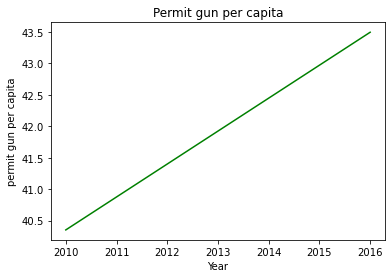

In [64]:
#plot the result for better comparaison:
year = [2010, 2016]
permit_per_capita = [df_permit_10, df_permit_16]

plt.title('Permit gun per capita')
plt.xlabel('Year')
plt.ylabel('permit gun per capita')
plt.plot(year, permit_per_capita, color='green')
plt.show()

### Answer Q4:
> From the previous results, we note that the percentage of permit per capita in:

> - **2010** is: **40.351190607290896%**
> - **2016** is: **43.49408836341008%**

> According to the plot line, the percentage of High gun increased from **2010** to **2016**: **3.14٪**

<a id="conclusions"></a>
# Conclusions

> After completing the answer to the questions posed by analyzing the existing data
We extracted the following:
The percentage of Gun purchases increased during the **6** years from **2010** to **2016** by **2.80%**

>Where I reached a year

>- **2010: 0.3978133320178106%**
>- **2016 : 0.677793390263384%**

>On the other hand, the percentage of obtaining a permit compared to the number of gun per capita during a year was:

>- **2010: 40.351190607290896%**
>- **2016: 43.49408836341008%**
Estimated increase rate: **3.14%**

>**Kentucky** was at the forefront of per capita arms in **2010-2016**

>The trend of guns:
>- In **2010** it was: **Long gun**
>- In **2016** it was: **Handgun**

> **Note**:
These data do not give us the reason for the increase in the per capita share of gun, nor even the reason why more than 50% of them are not permited,
It needs more data, such as the link to the purchase of guns with the number of crimes and their classification according to permited and unpermited ones

In [65]:
df_gun.to_csv('df_gun_final.csv',index = False)